## STEP 1 Load and Confirm Data

In [1]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris


%matplotlib inline

In [34]:
iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

In [36]:
type(iris.feature_names)

list

In [38]:

df_iris.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### STEP 2 Check for missing *values*

In [4]:
df_iris.isnull().any().any()

np.False_

In [18]:
print(df_iris.isnull().any())

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool


### STEP 3 Check for catagorical values

In [39]:
print(df_iris.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object


In [40]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_iris.select_dtypes(include=['object', 'category']).columns


In [41]:
categorical_cols

Index([], dtype='object')

In [ ]:

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_iris[col] = le.fit_transform(df_iris[col])

### STEP 4 Address missing values

In [21]:
# dropping an entire column
dataset = df_iris.drop(['petal width (cm)'], axis = 1)

In [22]:
# filling with mean.
dataset = dataset.fillna(dataset.mean(numeric_only=True))

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns) # ensure you split data first then transform.

### STEP 5 Understand distribution and correlation

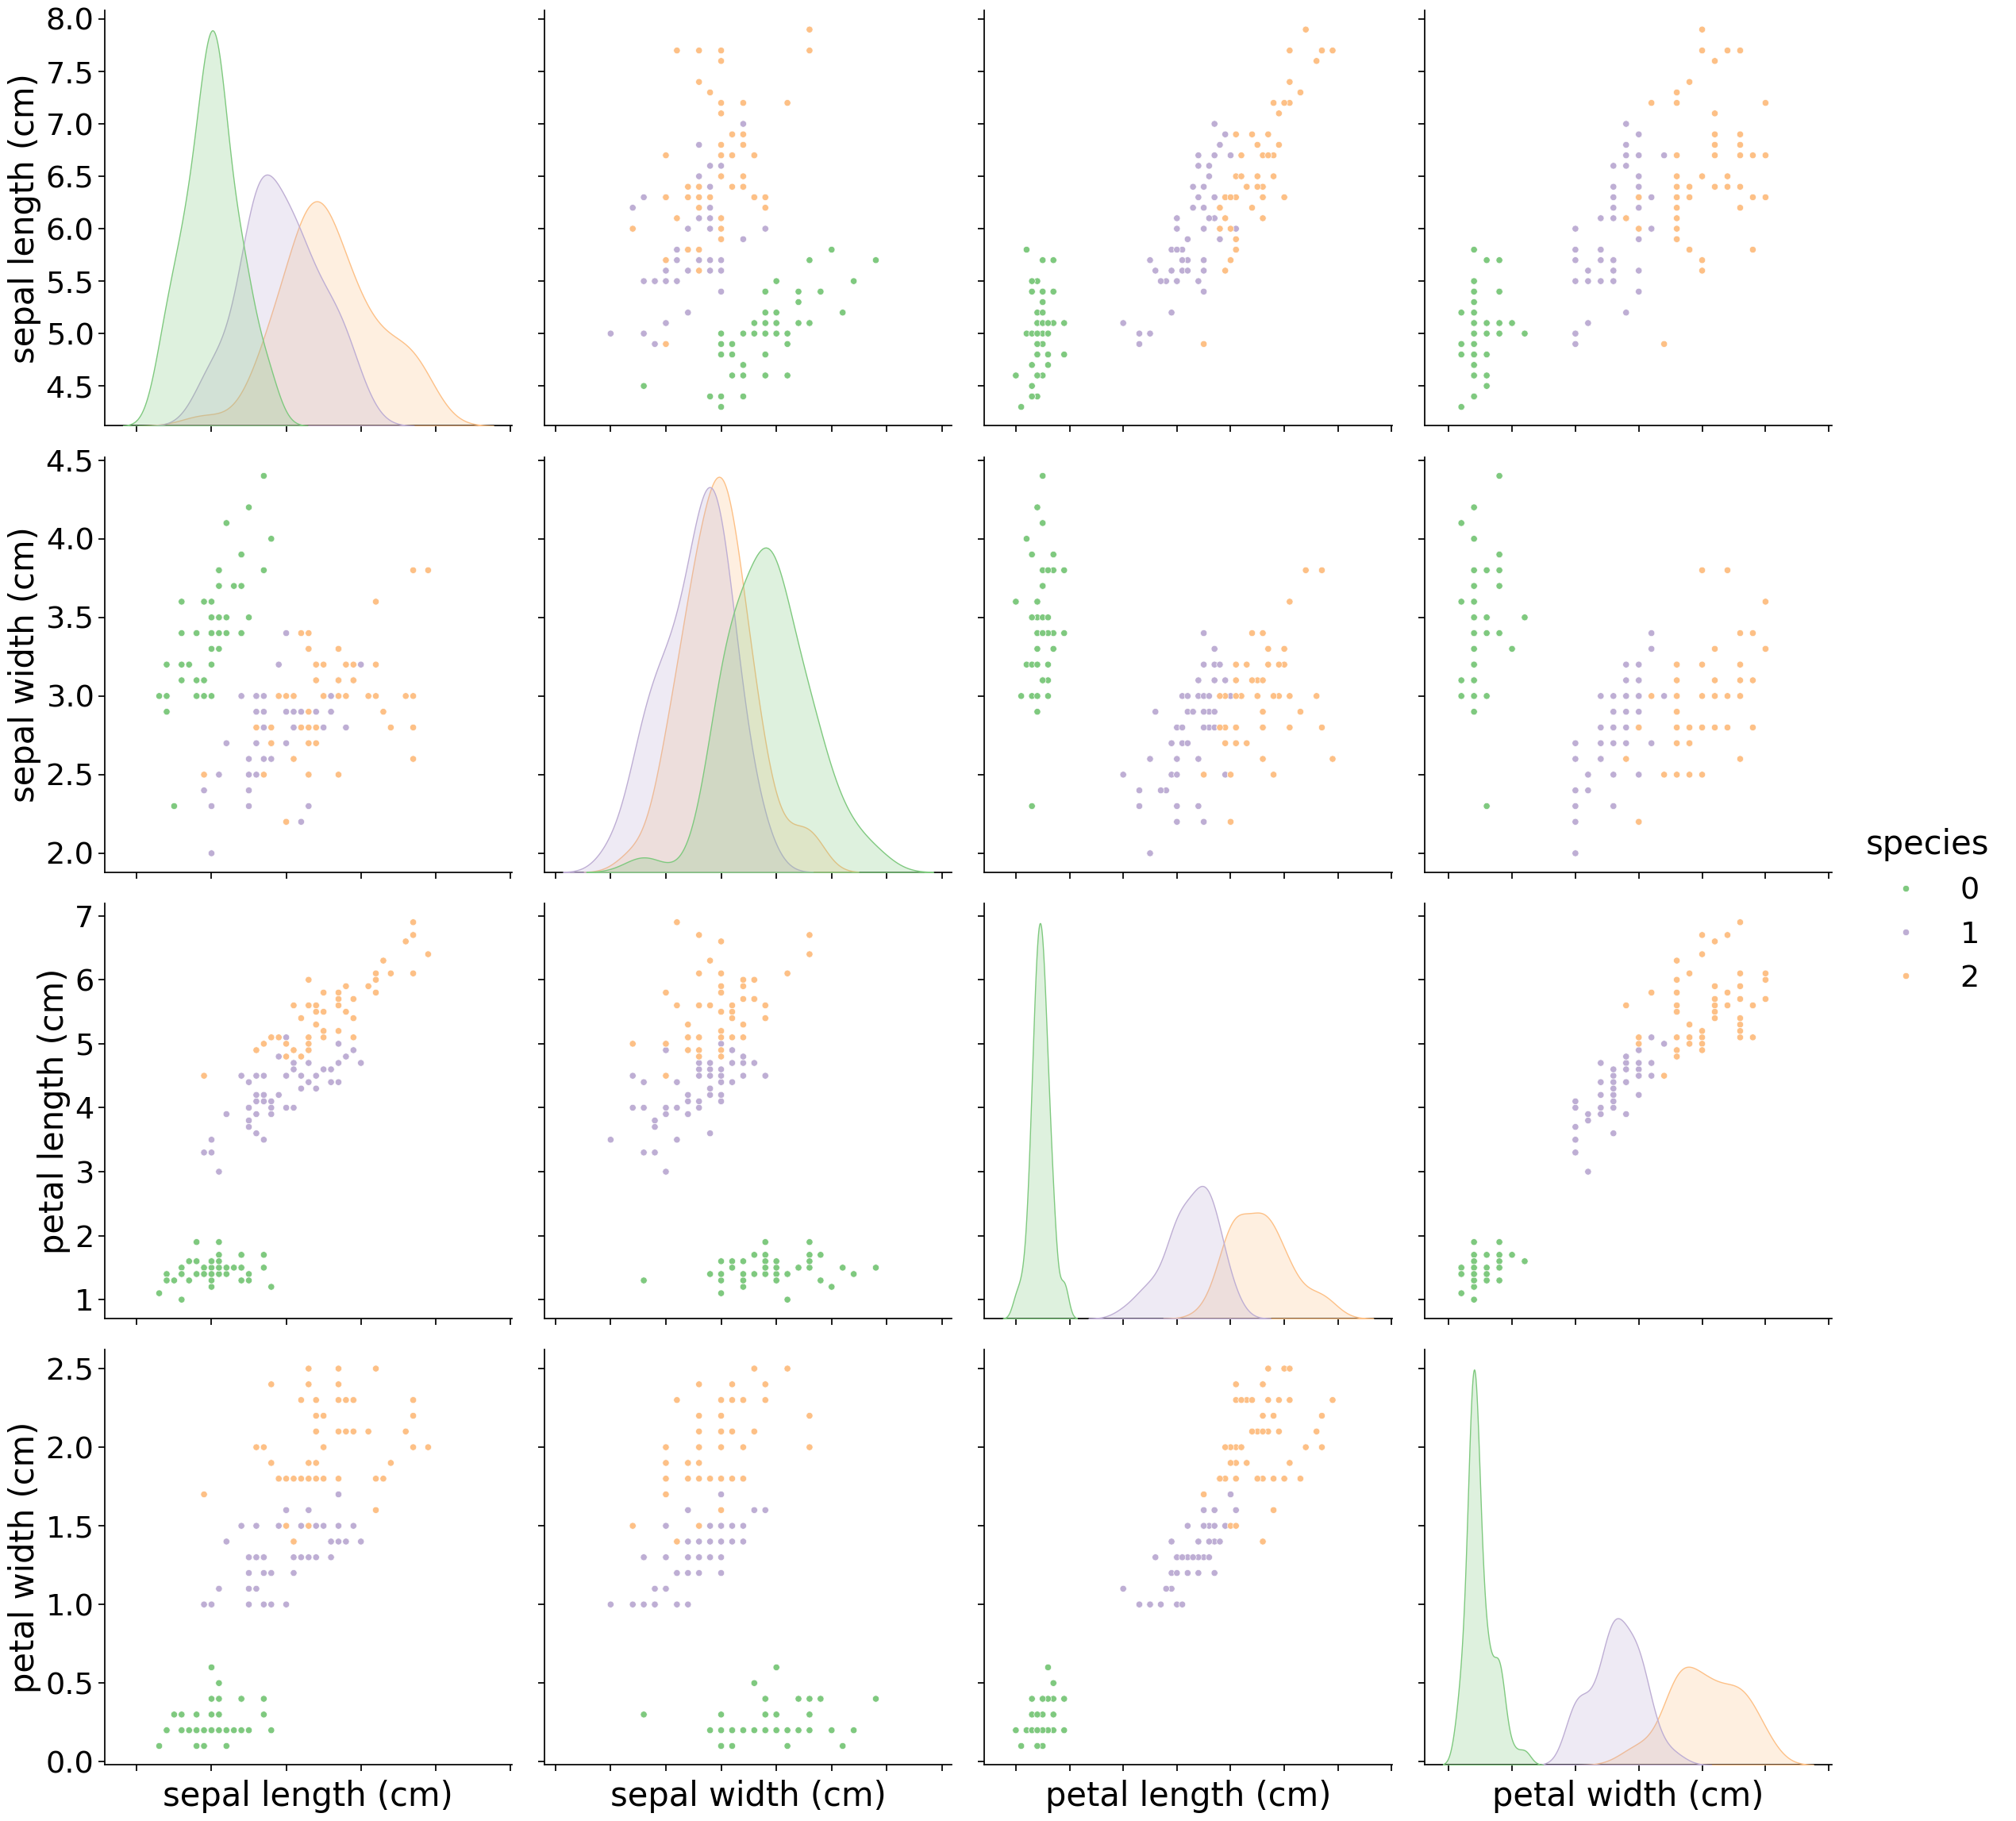

In [8]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df_iris, hue='species', palette='Accent',height=6)
g.set(xticklabels=[]);

In [9]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

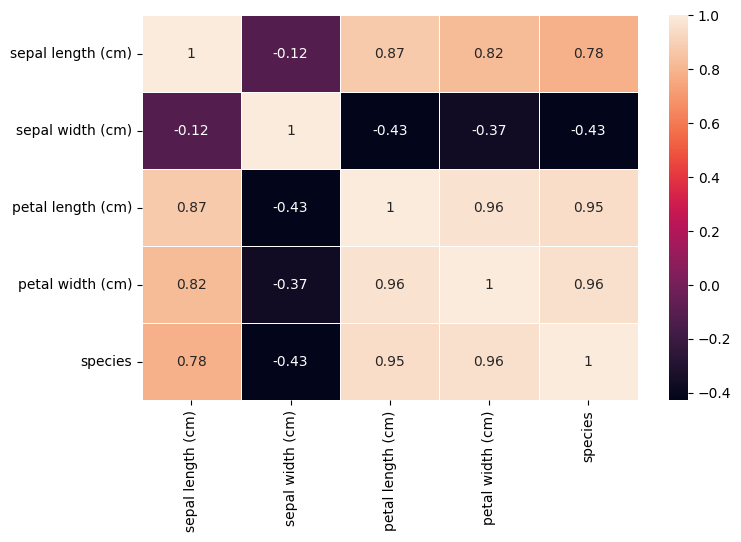

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df_iris.corr(), annot=True, linewidths=.5, ax=ax)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature in df_iris (excluding 'species' as it's the target)
features = df_iris.drop(columns=['species'])
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif_data)

             feature         VIF
0  sepal length (cm)  262.969348
1   sepal width (cm)   96.353292
2  petal length (cm)  172.960962
3   petal width (cm)   55.502060


### STEP 6 Identify outliers

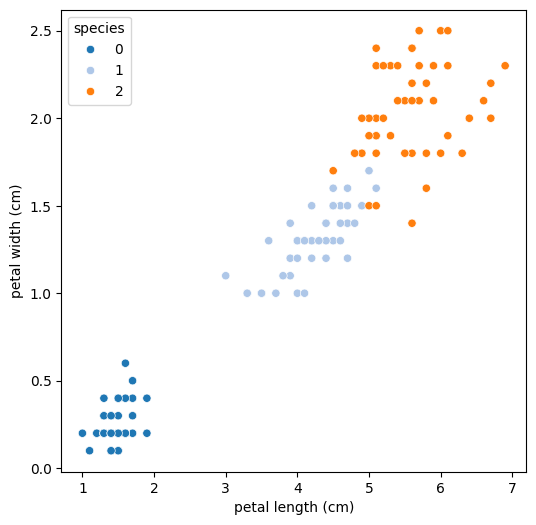

In [25]:
rcParams['figure.figsize'] = (6.0, 6.0)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df_iris, hue='species', palette='tab20')
plt.show()

<Axes: xlabel='species', ylabel='petal length (cm)'>

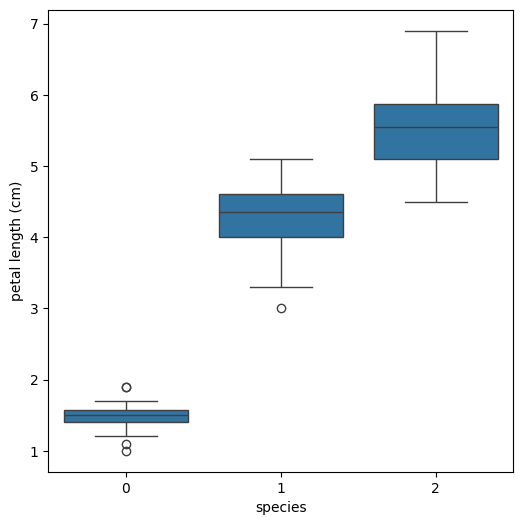

In [26]:
sns.boxplot(x='species', y='petal length (cm)', data=df_iris)

In [42]:
df_filtered = df_iris[df_iris['species'] == 2]

In [43]:
df_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


C:\Users\cleme\AppData\Local\Temp\ipykernel_25752\2470712187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered['petal length (cm)'])


<Axes: xlabel='petal length (cm)', ylabel='Density'>

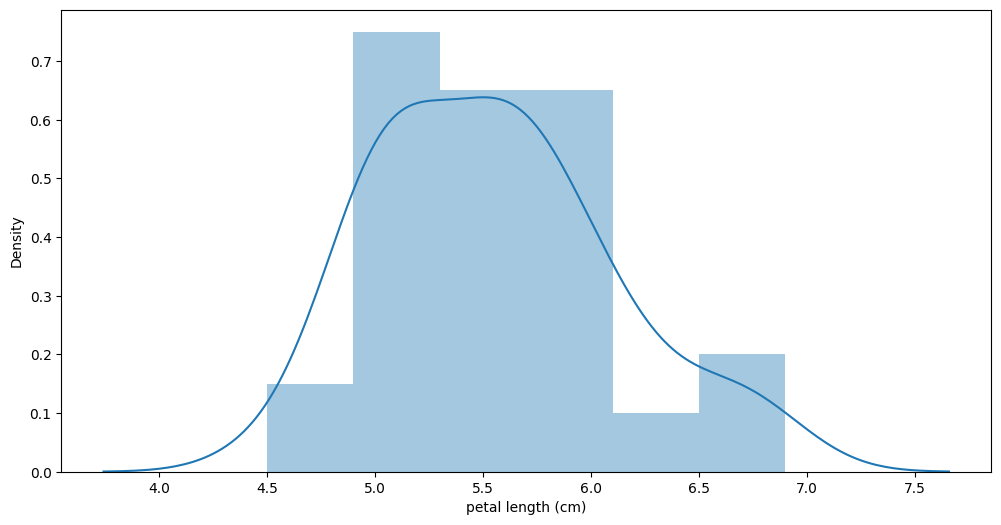

In [44]:
sns.distplot(df_filtered['petal length (cm)'])

# **Skewness**
Definition: Skewness measures the asymmetry of the distribution.
Interpretation:
Skewness = 0: The distribution is perfectly symmetrical.
Positive skewness: The distribution has a long tail on the right side (more data points are clustered on the left).
Negative skewness: The distribution has a long tail on the left side (more data points are clustered on the right).
"Good" Skewness:
In many cases, a skewness close to 0 is desired because it indicates a symmetrical distribution, which is often assumed in statistical analyses.
However, "good" skewness depends on the context. In some cases, a certain level of skewness might be expected or even desirable (e.g., income distributions typically have positive skewness).

Moderate skew: Skewness between -0.5 and -1 (negative) or 0.5 and 1 (positive).
High skew: Skewness less than -1 (negative) or greater than 1 (positive).

# **Kurtosis**
Definition: Kurtosis measures the "tailedness" of the distribution, or the presence of outliers.
Interpretation:
Kurtosis = 3: This is the kurtosis of a normal distribution, known as mesokurtic.
Kurtosis > 3: The distribution has heavy tails and a sharp peak (leptokurtic), indicating more outliers.
Kurtosis < 3: The distribution has lighter tails and a flatter peak (platykurtic), indicating fewer outliers.
"Good" Kurtosis:
A kurtosis close to 3 is often considered "good" because it indicates a normal-like distribution, which is a common assumption in statistical models.
However, if you're analyzing data where outliers are important, a higher kurtosis might be more appropriate.


C:\Users\cleme\AppData\Local\Temp\ipykernel_25752\796521764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_filtered["petal length (cm)"], label="Skewness: %.2f"%(df_filtered["petal length (cm)"].skew()))


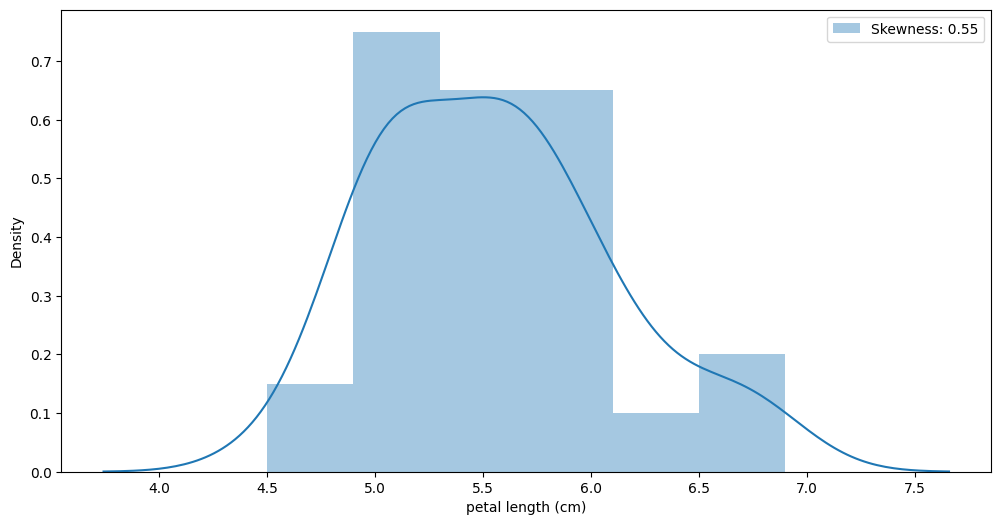

In [30]:
from scipy.stats import skew

rcParams['figure.figsize'] = (12.0, 6.0)
g = sns.distplot(df_filtered["petal length (cm)"], label="Skewness: %.2f"%(df_filtered["petal length (cm)"].skew()))
g = g.legend(loc="best")
plt.show()

### STEP 7 Normalize data

In [45]:
df_filtered["petal length (cm) norm"] = np.log1p(df_filtered["petal length (cm)"])

C:\Users\cleme\AppData\Local\Temp\ipykernel_25752\1065984864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["petal length (cm) norm"] = np.log1p(df_filtered["petal length (cm)"])


C:\Users\cleme\AppData\Local\Temp\ipykernel_25752\601205624.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_filtered["petal length (cm) norm"], label="Skewness: %.2f"%(df_filtered["petal length (cm) norm"].skew()))


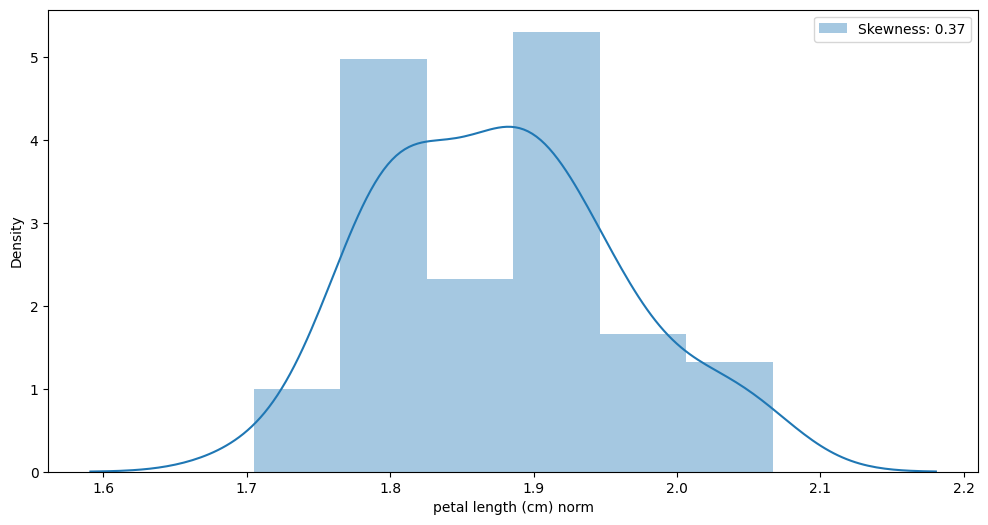

In [46]:
rcParams['figure.figsize'] = (12.0, 6.0)
g = sns.distplot(df_filtered["petal length (cm) norm"], label="Skewness: %.2f"%(df_filtered["petal length (cm) norm"].skew()))
g = g.legend(loc="best")
plt.show()